In [184]:
import os
import json
from glob import glob

In [33]:
import numpy as np
import pandas as pd
from collections import Counter

In [185]:
import matplotlib.pyplot as plt
# plt.style.use("ggplot")

In [21]:
from sklearn.metrics import classification_report, confusion_matrix

In [23]:
import spacy
nlp = spacy.load('en_core_web_lg')

#### Plot Confusion Matrix

In [458]:
def plot_confusion_matrix(y_true, y_pred, classes, figsize=(12,12), normalize=False,
                          title=None, cmap=plt.cm.Blues):
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'
    cm = confusion_matrix(y_true, y_pred)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    fig, ax = plt.subplots(figsize=figsize)
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

# Test Data

In [134]:
test_data = [row 
             for folder_name in glob('Batches/*')
             for test_file in glob(folder_name + '/test_*.csv')
             for row in pd.read_csv(test_file).to_dict(orient='records')]

len(test_data)

8337

# Berfu'dan

# Simge'den

In [164]:
simge_pred = [row 
              for folder_name in glob('Batches/*') 
              for row in pd.read_csv(os.path.join(folder_name, 'predictions.csv')).to_dict(orient='records')]
len(simge_pred)

8337

### Scores

In [165]:
simgedf = pd.DataFrame(simge_pred)

In [166]:
print(classification_report(simgedf['label'], simgedf['prediction']))

              precision    recall  f1-score   support

           0       0.90      0.96      0.93      6876
           1       0.65      0.44      0.52      1299
           2       0.48      0.30      0.37       162

   micro avg       0.87      0.87      0.87      8337
   macro avg       0.67      0.57      0.61      8337
weighted avg       0.85      0.87      0.85      8337



### Confusion Matrix

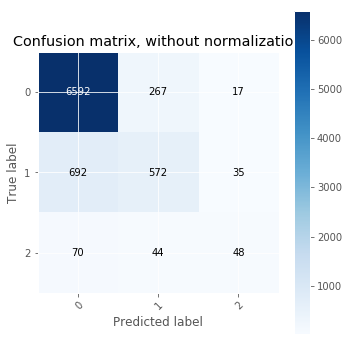

In [465]:
plot_confusion_matrix(simgedf['label'], simgedf['prediction'], classes=['0','1','2'], figsize=(5,5))

### NLP Enrichments

In [431]:
with open('./Batches/simge_preds_enriched.json', 'r') as jf:
    simge_pred = json.load(jf)
len(simge_pred), simge_pred[0].keys()

(8337,
 dict_keys(['pos_tags', 'tokens', 'label', 'sentence', 'ner_entities', 'prediction']))

### Sentence Lists

In [432]:
true_sents = [sent for sent in simge_pred if sent['label'] == sent['prediction']]
print('True Sentences:', len(true_sents))

True Sentences: 7212


In [433]:
false_sents = [sent for sent in simge_pred if sent['label'] != sent['prediction']]
print('False Sentences:', len(false_sents))

False Sentences: 1125


In [434]:
# 1 = 1
true_positive_sents = [sent for sent in simge_pred if sent['label'] == 1 and sent['prediction'] == 1]
print('True Positive Sentences:', len(true_positive_sents))

True Positive Sentences: 572


In [435]:
# 0 = 0
true_negative_sents = [sent for sent in simge_pred if sent['label'] == 0 and sent['prediction'] == 0]
print('True Negative Sentences:', len(true_negative_sents))

True Negative Sentences: 6592


In [436]:
# Type I Errors (0 = 1)
false_positive_sents = [sent for sent in simge_pred if sent['label'] == 0 and sent['prediction'] == 1]
print('False Positive Sentences:', len(false_positive_sents))

False Positive Sentences: 267


In [437]:
# Type II Errors (1 = 0)
false_negative_sents = [sent for sent in simge_pred if sent['label'] == 1 and sent['prediction'] == 0]
print('False Negative Sentences:', len(false_negative_sents))

False Negative Sentences: 692


### Sentence Length Comparisons

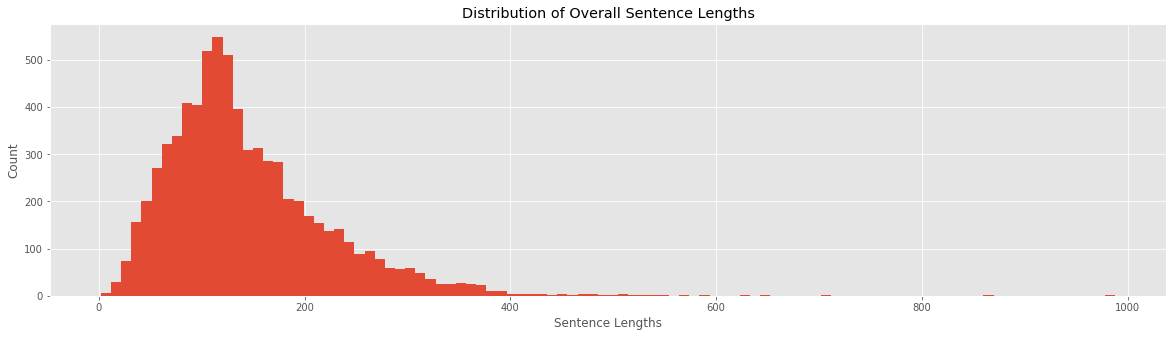

In [210]:
plt.figure(figsize=(20,5))
plt.hist([len(sent['sentence']) for sent in true_sents], bins=100)
plt.title('Distribution of Overall Sentence Lengths')
plt.xlabel('Sentence Lengths')
plt.ylabel('Count')
plt.show()

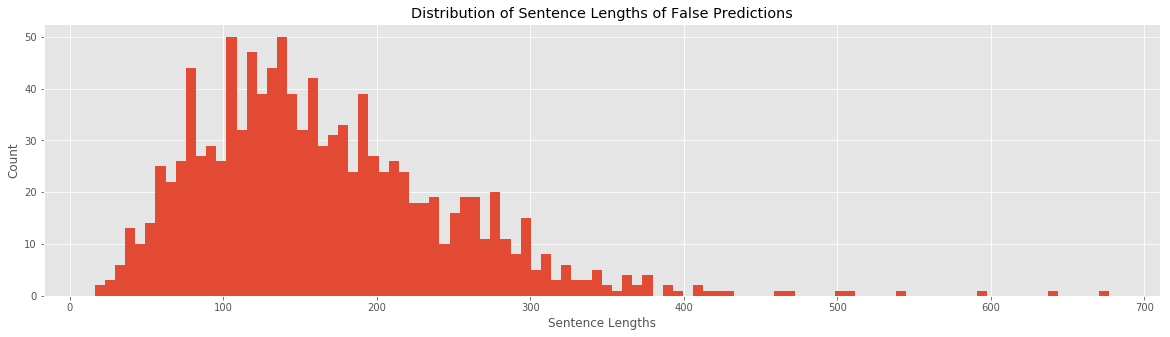

In [211]:
plt.figure(figsize=(20,5))
plt.hist([len(sent['sentence']) for sent in false_sents], bins=100)
plt.title('Distribution of Sentence Lengths of False Predictions')
plt.xlabel('Sentence Lengths')
plt.ylabel('Count')
plt.show()

### Token Lists

In [438]:
token_list = [token for sent in simge_pred for token in sent['tokens']]
token_counts = Counter(token_list)
print('Unique Tokens:', len(token_counts))

Unique Tokens: 17511


In [439]:
true_tokens = [token for sent in true_sents for token in sent['tokens']]
true_token_counts = Counter(true_tokens)
print('Unique in-True Tokens:', len(true_token_counts))

Unique in-True Tokens: 16153


In [440]:
false_tokens = [token for sent in false_sents for token in sent['tokens']]
false_token_counts = Counter(false_tokens)
print('Unique in-False Tokens:', len(false_token_counts))

Unique in-False Tokens: 6191


In [441]:
only_true_tokens = [token for token in true_tokens if token not in false_tokens]
only_true_counts = Counter(only_true_tokens)
print('Unique Only-in-True Tokens:', len(only_true_counts))

Unique Only-in-True Tokens: 11320


In [442]:
only_false_tokens = [token for token in false_tokens if token not in true_tokens]
only_false_counts = Counter(only_false_tokens)
print('Unique Only-in-False Tokens:', len(set(only_false_counts)))

Unique Only-in-False Tokens: 1358


In [443]:
# 1 = 1
true_positive_tokens = [token for sent in true_positive_sents for token in sent['tokens']]
true_positive_counts = Counter(true_positive_tokens)
print('Unique in-True-Positive Tokens:', len(true_positive_counts))

Unique in-True-Positive Tokens: 4114


In [444]:
# 0 = 0
true_negative_tokens = [token for sent in true_negative_sents for token in sent['tokens']]
true_negative_counts = Counter(true_negative_tokens)
print('Unique in-True-Negative Tokens:', len(true_negative_counts))

Unique in-True-Negative Tokens: 15139


In [445]:
# Type I errors (0 = 1)
false_positive_tokens = [token for sent in false_positive_sents for token in sent['tokens']]
false_positive_counts = Counter(false_positive_tokens)
print('Unique in-False-Positive Tokens:', len(false_positive_counts))

Unique in-False-Positive Tokens: 2447


In [446]:
only_fp_tokens = [token for token in false_positive_tokens if token not in true_positive_tokens]
only_fp_counts = Counter(only_fp_tokens)
print('Unique Only-in-False-Positive Tokens:', len(only_fp_counts))

Unique Only-in-False-Positive Tokens: 1119


In [447]:
# Type II errors (1 = 0)
false_negative_tokens = [token for sent in false_negative_sents for token in sent['tokens']]
false_negative_counts = Counter(false_negative_tokens)
print('Unique in-False-Negative Tokens:', len(false_negative_counts))

Unique in-False-Negative Tokens: 4617


In [448]:
only_fn_tokens = [token for token in false_negative_tokens if token not in true_positive_tokens]
only_fn_counts = Counter(only_fn_tokens)
print('Unique Only-in-False-Negative Tokens:', len(only_fn_counts))

Unique Only-in-False-Negative Tokens: 2472


### Most Common Tokens

In [449]:
# 'protest' is in both true and false sentences 
print('Protest in in-True tokens: ' + str(true_token_counts['protest'])) 
print('Protest in in-False tokens: '+ str(false_token_counts['protest']))

Protest in in-True tokens: 118
Protest in in-False tokens: 52


In [457]:
true_token_counts['shooting'], false_token_counts['shooting']

(27, 12)

In [455]:
false_negative_counts['gun']

6

In [450]:
def get_simple_token_counts(token_list, num_words=None):
    counter = Counter(token_list)
    if not num_words:
        num_words = len(counter)
    return pd.DataFrame([(token, count, token_counts[token]) 
                         for token, count in counter.most_common(num_words)],
                        columns=['Token', 'Count', 'Total Count'])

In [451]:
get_simple_token_counts(true_token_counts, 1)

,Token,Count,Total Count
0,the,12421,14777


In [366]:
get_simple_token_counts(false_token_counts, 1)

,Token,Count,Total Count
0,the,2356,14777


In [452]:
get_simple_token_counts(only_false_tokens, 100)

,Token,Count,Total Count
0,carnage,9,9
1,padayatra,7,7
2,fasting,6,6
3,tanzanian,5,5
4,throwing,5,5
5,villupuram,4,4
6,blot,4,4
7,hijack,4,4
8,dusk,4,4
9,gorakhpur-,3,3


In [259]:
get_simple_token_counts(only_true_tokens, 100)

,Token,Count,Total Count
0,vote,46,46
1,process,44,44
2,policy,40,40
3,expected,39,39
4,politics,35,35
5,book,31,31
6,confidence,30,30
7,answer,30,30
8,jaitley,30,30
9,especially,29,29


In [283]:
get_simple_token_counts(false_positive_tokens)

,Token,Count,Total Count
0,the,543,14777
1,",",279,8441
2,.,268,7842
3,of,242,5451
4,in,231,4473
5,and,161,4211
6,to,137,4872
7,a,136,3501
8,on,97,2027
9,-,73,1589


In [281]:
get_simple_token_counts(false_negative_tokens)

,Token,Count,Total Count
0,the,1442,14777
1,",",848,8441
2,.,702,7842
3,of,580,5451
4,in,502,4473
5,and,454,4211
6,to,383,4872
7,a,365,3501
8,on,236,2027
9,-,176,1589


In [280]:
get_simple_token_counts(only_fp_tokens)

,Token,Count,Total Count
0,msf,6,12
1,seems,5,22
2,chamber,4,5
3,hand,4,39
4,deal,4,47
5,sp,4,44
6,scholarships,4,8
7,plant,4,36
8,amethi,4,11
9,thomas,4,12


In [413]:
get_simple_token_counts(only_fn_tokens)

,Token,Count,Total Count
0,plant,10,36
1,carnage,9,9
2,padayatra,7,7
3,ministers,7,55
4,ram,7,31
5,raj,7,36
6,away,7,61
7,demolition,7,15
8,posters,7,16
9,alliance,6,36


### Statistics DataFrame

In [461]:
def get_per(local_count, total_count):
    return str(round((local_count/total_count)*100, 2)) + '%'# + ' (' + str(local_count) + ')'

In [462]:
statsdf = pd.DataFrame([(token, count, 
                         get_per(true_token_counts[token], count), 
                         get_per(false_token_counts[token], count),
                         get_per(only_true_counts[token], count),
                         get_per(only_false_counts[token], count),
                         get_per(true_positive_counts[token], count),
                         get_per(true_negative_counts[token], count),
                         get_per(false_positive_counts[token], count),
                         get_per(only_fp_counts[token], count),
                         get_per(false_negative_counts[token], count),
                         get_per(only_fn_counts[token], count))
                        for token, count in token_counts.most_common(len(token_counts))],
                       columns=['Token', 'Total Count', 
                                'in-True', 
                                'in-False',
                                'Only-in-True',
                                'Only-in-False',
                                'in-True-Positive',
                                'in-True-Negative',
                                'in-False-Positive',
                                'Only-in-False-Positive',
                                'in-False-Negative',
                                'Only-in-False-Negative'])

In [464]:
statsdf

,Token,Total Count,in-True,in-False,Only-in-True,Only-in-False,in-True-Positive,in-True-Negative,in-False-Positive,Only-in-False-Positive,in-False-Negative,Only-in-False-Negative
0,the,14777,84.06%,15.94%,0.0%,0.0%,8.03%,75.3%,3.67%,0.0%,9.76%,0.0%
1,",",8441,84.49%,15.51%,0.0%,0.0%,8.49%,75.37%,3.31%,0.0%,10.05%,0.0%
2,.,7842,85.51%,14.49%,0.0%,0.0%,7.45%,77.45%,3.42%,0.0%,8.95%,0.0%
3,of,5451,82.79%,17.21%,0.0%,0.0%,9.74%,72.56%,4.44%,0.0%,10.64%,0.0%
4,to,4872,86.27%,13.73%,0.0%,0.0%,6.34%,79.04%,2.81%,0.0%,7.86%,0.0%
5,in,4473,81.49%,18.51%,0.0%,0.0%,12.83%,68.03%,5.16%,0.0%,11.22%,0.0%
6,and,4211,83.26%,16.74%,0.0%,0.0%,8.74%,73.74%,3.82%,0.0%,10.78%,0.0%
7,a,3501,82.98%,17.02%,0.0%,0.0%,10.4%,71.69%,3.88%,0.0%,10.43%,0.0%
8,on,2027,80.51%,19.49%,0.0%,0.0%,12.14%,66.9%,4.79%,0.0%,11.64%,0.0%
9,that,1896,87.08%,12.92%,0.0%,0.0%,4.43%,82.33%,2.58%,0.0%,8.49%,0.0%


In [463]:
def filter_stats(token_list, num_words=None):
    return statsdf[statsdf['Token'].isin(token_list)].sort_values(by='Total Count', ascending=False)[:num_words].reset_index(drop=True)

In [427]:
filter_stats(only_fp_tokens, 10)

,Token,Total Count,in-True,in-False,Only-in-True,Only-in-False,in-True-Positive,in-True-Negative,in-False-Positive,Only-in-False-Positive,in-False-Negative,Only-in-False-Negative
0,both,89,88.76%,11.24%,0.0%,0.0%,0.0%,88.76%,3.37%,3.37%,4.49%,4.49%
1,nuclear,74,97.3%,2.7%,0.0%,0.0%,0.0%,95.95%,1.35%,1.35%,1.35%,1.35%
2,session,67,94.03%,5.97%,0.0%,0.0%,0.0%,94.03%,1.49%,1.49%,2.99%,2.99%
3,away,61,80.33%,19.67%,0.0%,0.0%,0.0%,80.33%,4.92%,4.92%,11.48%,11.48%
4,n't,58,87.93%,12.07%,0.0%,0.0%,0.0%,87.93%,3.45%,3.45%,6.9%,6.9%
5,does,58,91.38%,8.62%,0.0%,0.0%,0.0%,91.38%,3.45%,3.45%,1.72%,1.72%
6,upa,58,94.83%,5.17%,0.0%,0.0%,0.0%,93.1%,1.72%,1.72%,1.72%,1.72%
7,says,57,92.98%,7.02%,0.0%,0.0%,0.0%,92.98%,3.51%,3.51%,3.51%,3.51%
8,ministers,55,83.64%,16.36%,0.0%,0.0%,0.0%,81.82%,1.82%,1.82%,12.73%,12.73%
9,corruption,50,92.0%,8.0%,0.0%,0.0%,0.0%,88.0%,2.0%,2.0%,2.0%,2.0%


In [429]:
filter_stats(only_fn_tokens, 10)

,Token,Total Count,in-True,in-False,Only-in-True,Only-in-False,in-True-Positive,in-True-Negative,in-False-Positive,Only-in-False-Positive,in-False-Negative,Only-in-False-Negative
0,url,587,99.15%,0.85%,0.0%,0.0%,0.0%,99.15%,0.0%,0.0%,0.85%,0.85%
1,both,89,88.76%,11.24%,0.0%,0.0%,0.0%,88.76%,3.37%,3.37%,4.49%,4.49%
2,?,84,95.24%,4.76%,0.0%,0.0%,0.0%,95.24%,0.0%,0.0%,3.57%,3.57%
3,nuclear,74,97.3%,2.7%,0.0%,0.0%,0.0%,95.95%,1.35%,1.35%,1.35%,1.35%
4,session,67,94.03%,5.97%,0.0%,0.0%,0.0%,94.03%,1.49%,1.49%,2.99%,2.99%
5,away,61,80.33%,19.67%,0.0%,0.0%,0.0%,80.33%,4.92%,4.92%,11.48%,11.48%
6,n't,58,87.93%,12.07%,0.0%,0.0%,0.0%,87.93%,3.45%,3.45%,6.9%,6.9%
7,does,58,91.38%,8.62%,0.0%,0.0%,0.0%,91.38%,3.45%,3.45%,1.72%,1.72%
8,you,58,94.83%,5.17%,0.0%,0.0%,0.0%,94.83%,0.0%,0.0%,5.17%,5.17%
9,upa,58,94.83%,5.17%,0.0%,0.0%,0.0%,93.1%,1.72%,1.72%,1.72%,1.72%


### Part-of-Speech Comparisons